##  Tensorflow 무작정 사용해보기
 - 손글씨를 훈련시켜 숫자를 판별
 - https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
import numpy as np
import matplotlib.pyplot as plt

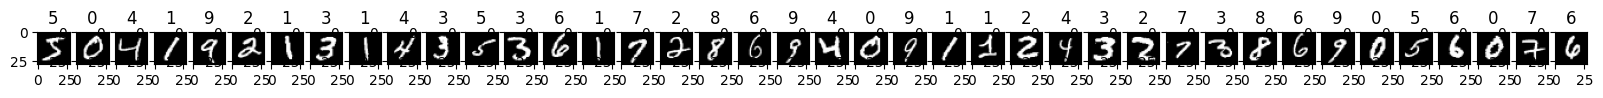

In [23]:
import matplotlib.pyplot as plt

y_train[:3]

def plot(dataX, dataY, num = 10):
    plt.figure(figsize=(20,20))

    for cnt, x in enumerate(dataX[:num]):
        plt.subplot(1,num,cnt+1)
        plt.imshow(x,cmap='gray')
        plt.title(dataY[cnt])

def count(data):
    tmp = np.unique(data,return_counts=True)
    print(tmp)
    plt.figure(figsize=(5,3))
    plt.bar(tmp[0], tmp[1])

plot(x_train, y_train, 40)
# count(y_train)

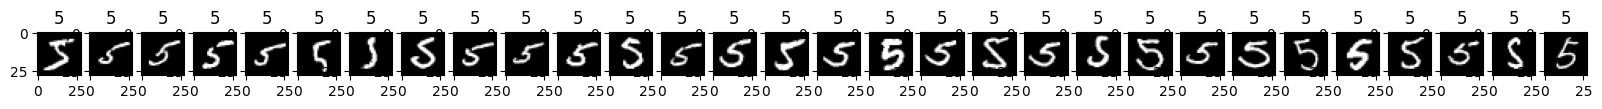

In [22]:
# 숫자 5
newX = []
newY = []

select_num=5
for x,y in zip(x_train, y_train):
    if y ==select_num:
        newX.append(x)
        newY.append(y)
# len(newY)
plot(newX,newY, 30)

In [25]:
np.shape(x_train), np.shape(y_train)

((60000, 28, 28), (60000,))

### mnist
 - 크기 (28, 28)
 - 갯수 (60000)
 - 흑백
 - 배경 = 검은색
 - 글자의 위치
 - 0 ~255 / 255로 나눈 값

In [31]:
# 모델제작
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),      # 28*28 크기로, x변수가 784개, np.shape(x_train)
    tf.keras.layers.Dense(128, activation='relu'),      # w가 784개 생성, 그런경우를 128개 만들자
    tf.keras.layers.Dropout(0.2),                       # 784개의 w가 128개의 경우의수로 생성(총생성되는 w는 784*128, 그 중 20%는 0으로)
    tf.keras.layers.Dense(10, activation='softmax')     # 손글씨 이미지를 0,1,2,3...9 중 어떤 숫자인가?
])                                                              ## np.unique(y_train)의 max값 +1 = 10


# 배치사이즈, 오차계산법(경사하강법, 오차역전파), 화면에 보여줄 값 지정
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


# 모델컴파일러에서 모델을 갖고와 순전파와 역전파를 진행하고
# w,b를 계속 갱신하며 모든데이털르 총 epochs 만큼 반복!
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))           # 트레이닝 자료를 이용하여 w,b를 갱신, test는 아직 안함

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2974 - accuracy: 0.9147 - val_loss: 0.1411 - val_accuracy: 0.9585
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1421 - accuracy: 0.9574 - val_loss: 0.1049 - val_accuracy: 0.9700
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1081 - accuracy: 0.9670 - val_loss: 0.0844 - val_accuracy: 0.9754
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0878 - accuracy: 0.9730 - val_loss: 0.0775 - val_accuracy: 0.9774
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0740 - accuracy: 0.9768 - val_loss: 0.0778 - val_accuracy: 0.9763
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0667 - accuracy: 0.9785 - val_loss: 0.0745 - val_accuracy: 0.9775
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0580 - accuracy: 0.9806 - val_loss: 0.0744 - val_accuracy: